# Stroke Prediction and Analysis


**Introduction**
* A stroke occurs when a blood vessel in the brain ruptures and bleeds, or when there’s a blockage in the blood supply to the brain. The rupture or blockage prevents blood and oxygen from reaching the brain’s tissues.

* Risk factors for stroke

## Statement
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

**Data**

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not

**Note: "Unknown" in smoking_status means that the information is unavailable for this patient**

## Dataset Sourse
* **www.kaggle.com**
* **www.who.org**

**Importing Libraries** 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Preventing warnings from libraries especially scikit learn
import warnings
warnings.filterwarnings('ignore')

**Importing Data and viewing some basic details**

In [46]:
df = pd.read_csv(r"C:\Users\abc\Desktop\StrokePrediction\healthcare-dataset-stroke-data.csv")
df.shape #Shows number of rows and columns in a dataset

(5110, 12)

### Data Exploration

In [47]:
df.head() #Shows first 5 elements of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [48]:
df.info() #Gives information of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [49]:
df.drop(columns=["id"]).describe() # Give statistical details of each columns

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [50]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [51]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [52]:
df.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [53]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### Data Cleaning

In [54]:
#check for duplicates
df.duplicated().sum()

0

In [55]:
#check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

* **We can see that bmi has 201 missing values.**

In [56]:
# Replacing the missing values with mean
df.bmi.fillna(df.bmi.mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [57]:
df.info()#checking info after updating bmi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [58]:
df.describe()# checking describe after updating bmi.

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [59]:
# Roundoff age
df['age']=df['age'].apply(lambda x: round(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


* **Age has been round off and converted to int64**

### Data Analysis

 **2.Univariate Analytics**

In [60]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [61]:
# Dividing attributes between numerical and categorical list
numerics = ['age', 'avg_glucose_level', 'bmi']
cats = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

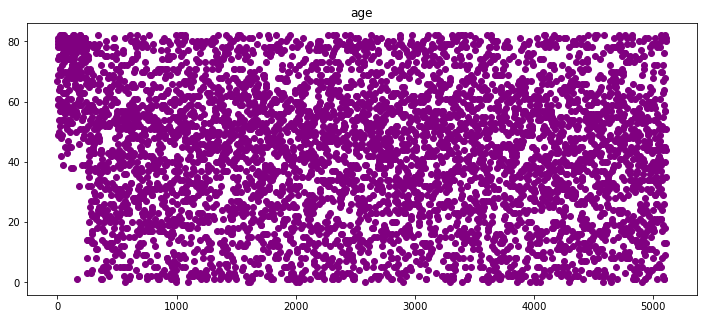

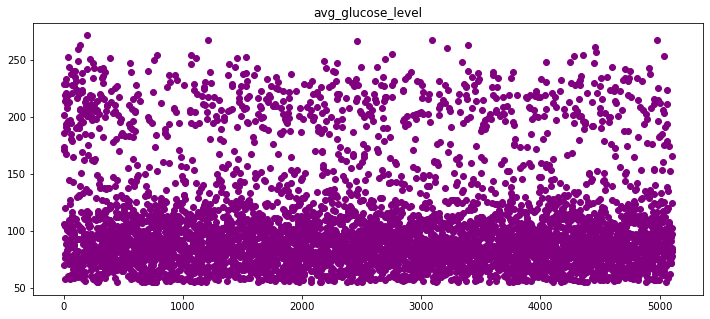

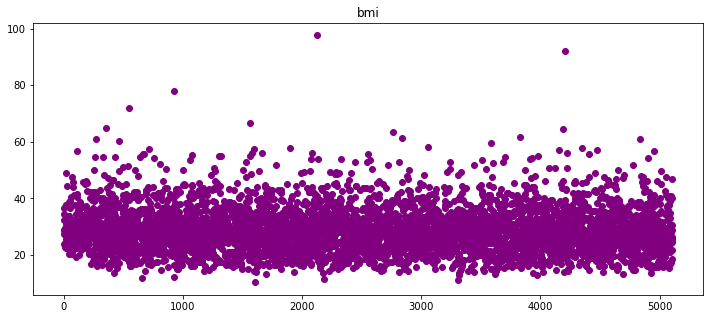

In [62]:
# numerics graph
for col in numerics:
    plt.figure(figsize=(12, 5))
    plt.scatter(np.arange(5110), df[col], c='purple')
    plt.title(col)
    plt.show()
    

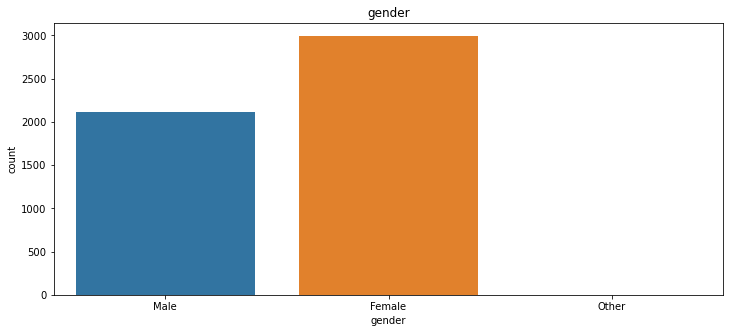

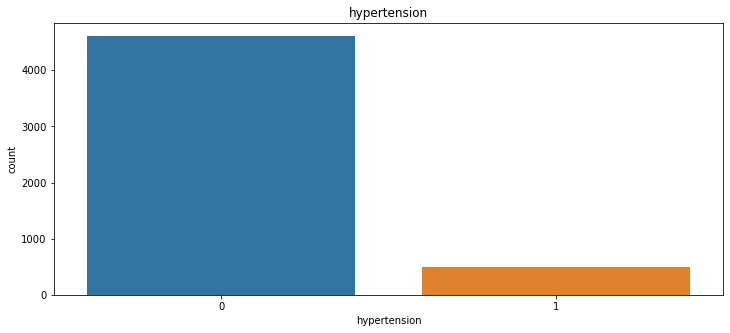

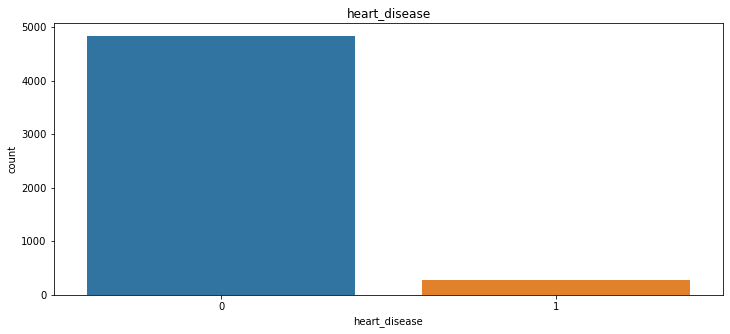

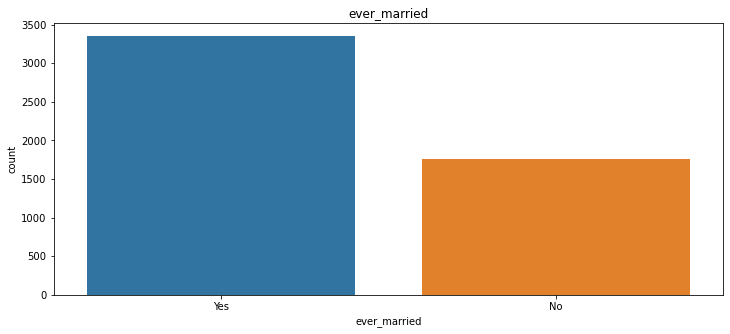

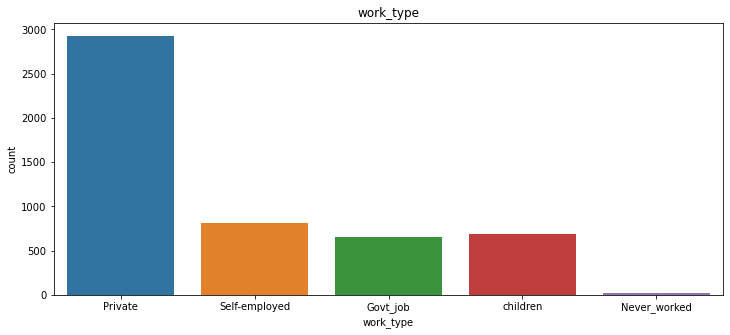

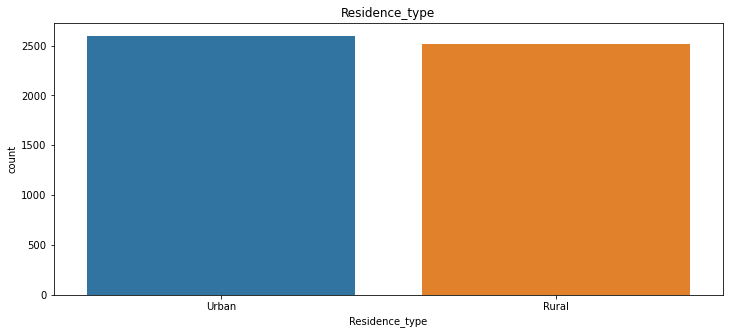

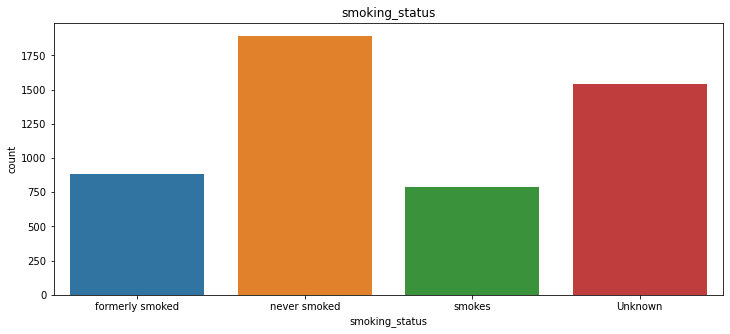

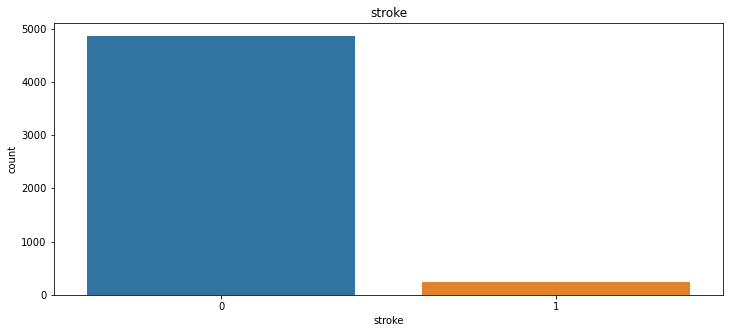

In [63]:
# categorical graph
for col in cats:
    plt.figure(figsize=(12,5))
    sns.countplot(df[col])
    plt.title(col)
    plt.show()

* we can see that there is a high-class imbalance in the above pair plot nearly one or two redpoint which represent the stroke that can cause the issue in the model which we create

* As we can see from the plot, the data is not balanced, this will result in a badly fitted model. To resolve this issue, we need to use SMOTE to balance the data. This will be done before fitting the model.



 **1. Bivariate Analytics**

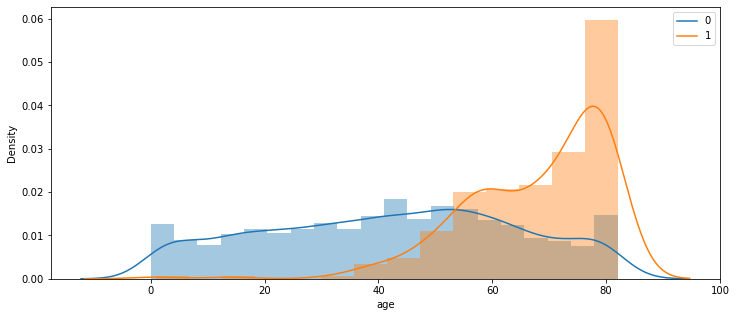

In [64]:
# numerical vs categorical
# Probablity Density Distribution

# Age vs Stroke
plt.figure(figsize=(12, 5))
sns.distplot(df.age[df.stroke==0])
sns.distplot(df.age[df.stroke==1])
plt.legend(['0','1'])
plt.show()

**NOTE**: The probablity density graph shows that person having age more than 60 have high density
      of having stroke. The reason being as person gets old, more diseases and issues body develops.

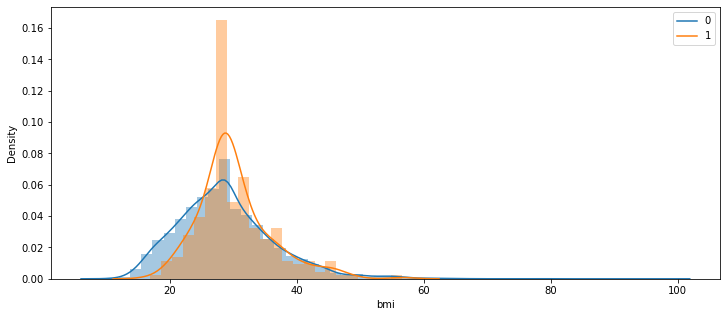

In [65]:
# Bmi vs Stroke
plt.figure(figsize=(12, 5))
sns.distplot(df.bmi[df.stroke==0])
sns.distplot(df.bmi[df.stroke==1])
plt.legend(['0','1'])
plt.show()

**NOTE**: Average BMI value of people affected by stroke is 30. BMI value of greater than 25 is considered to be obese. On a average we could say that people who are affected by stroke are obese. From the graph we could notice that few have bmi of greater than 45, they are considered to be morbidly obese.

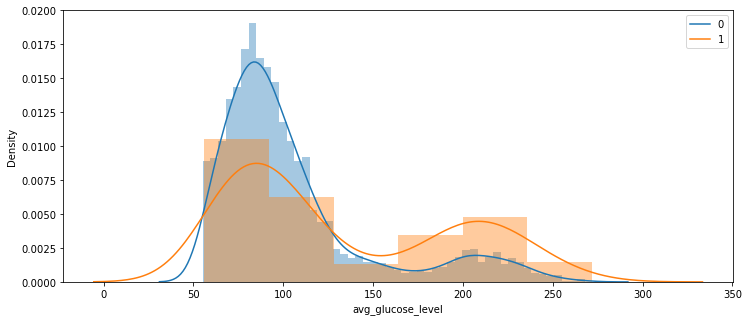

In [66]:
# Avg_glucose_level vs Stroke
plt.figure(figsize=(12, 5))
sns.distplot(df.avg_glucose_level[df.stroke==0])
sns.distplot(df.avg_glucose_level[df.stroke==1])
plt.legend(['0','1'])
plt.show()

**NOTE** = The probablity graph shows that person having glucose level from 50 to 120 have less chances of having stroke
      as compared to glucose level more than 125.

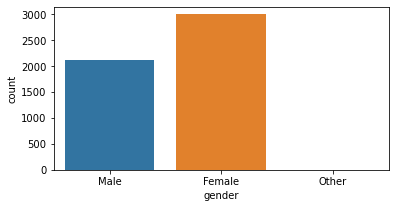

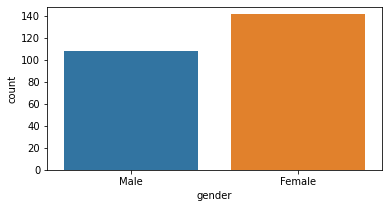

In [67]:
# Gender vs Stroke
plt.figure(figsize=(6, 3))
sns.countplot(df['gender'])
plt.show()
plt.figure(figsize=(6, 3))
sns.countplot(df['gender'][df.stroke==1])
plt.show()

**NOTE** : This graph depicts that females have more chance of having stoke than male  

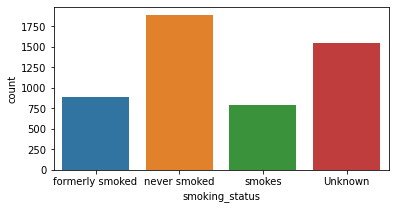

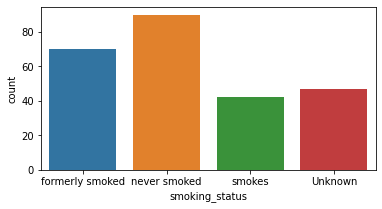

In [68]:
#Smoking Status vs Stroke
plt.figure(figsize=(6, 3))
sns.countplot(df['smoking_status'])
plt.show()
plt.figure(figsize=(6, 3))
sns.countplot(df['smoking_status'][df.stroke==1])
plt.show()

**NOTE**: This graph doesn't help in analysing stroke as it shows person who never smoked have more chance of having stroke.            

Text(0.5, 1.0, 'Work type of people affected by Stroke')

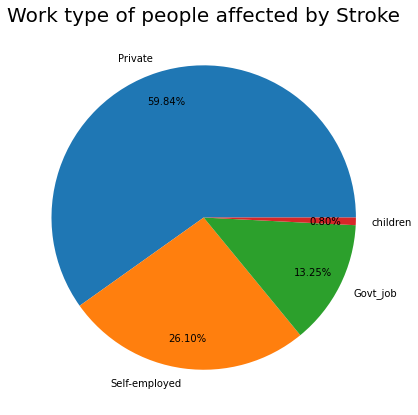

In [69]:
work_type = df[df['stroke'] == 1]['work_type']
values = work_type.value_counts()
labels = values.keys()
bar,ax = plt.subplots(figsize=(7,7))
plt.pie(x = values, labels = labels , autopct="%.2f%%",pctdistance=0.8)
plt.title('Work type of people affected by Stroke', fontsize=20)

**NOTE**:59.84% of the people who are affected by stroke belongs to private work type. Very less percent of around 13% of the people belongs to Govt Job. So, Based on the analysis we could say that the candiates working in private jobs might experience high stress or pressure.

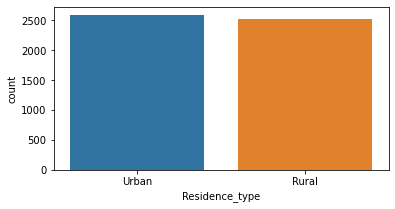

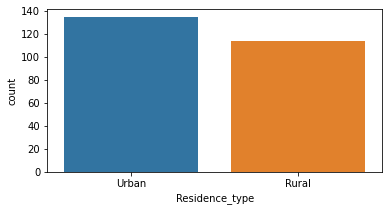

In [70]:
#Residence_type vs Stroke
plt.figure(figsize=(6, 3))
sns.countplot(df['Residence_type'])
plt.show()
plt.figure(figsize=(6, 3))
sns.countplot(df['Residence_type'][df.stroke==1])
plt.show()

**NOTE** = More people affected by Stroke are from Urban area. A possible reason could be people in urban areas might experience health issues due to pollution and other factors such as eating habits, etc

 **3.Multivariate Analytics**

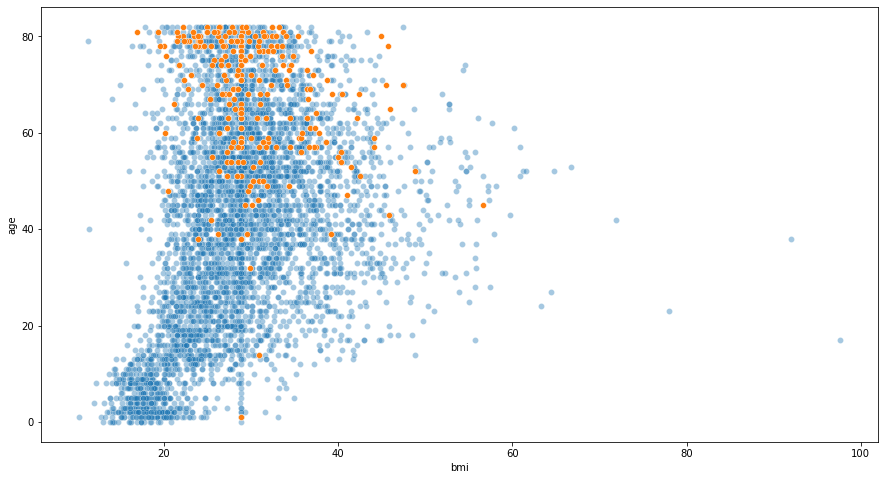

In [71]:
# Age vs BMI
plt.figure(figsize = (15,8))
ax = sns.scatterplot(x="bmi", y="age", alpha=0.4, data=df[df['stroke']==0])
sns.scatterplot(x = "bmi", y="age", alpha=1, data=df[df['stroke']==1], ax=ax)
plt.show()

**NOTE** = From the above Age vs BMI plot we can clearly see that when people attain an age of 40 or greater, the chances of having a stroke increases. After age 60, it tends to increase even more. Furthermore, people with a BMI of over 20-25 have shown a greatly increased chance of having a stroke.

So, from this plot we can conclude that people who are aged over 40 and have a BMI of over 20-25 have a grater probability of having a stroke

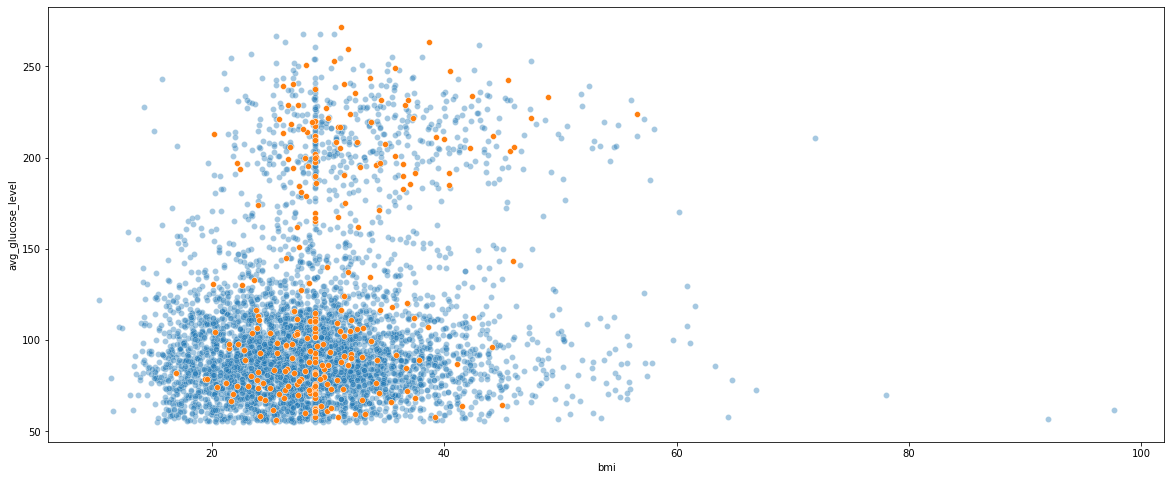

In [72]:
# AVG Glucose level vs BMI with hue = stroke
plt.figure(figsize = (20,8))
ax = sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=0.4, data=df[df['stroke']==0])
sns.scatterplot(x="bmi", y="avg_glucose_level", alpha=1, data=df[df['stroke']==1], ax=ax)
plt.show()

**NOTE**=From above Average Glucose Level and Bmi graph we can clearly see that when people having glucose level from 50 to 120, the chances of having a stroke increases. After 200, it tends to increase even more. Furthermore, people with a BMI of over 20-35 have shown a greatly increased chance of having a stroke.

So, from this plot we can conclude that people who have glucose level over 500 and have a BMI of over 20-35 have a grater probability of having a stroke

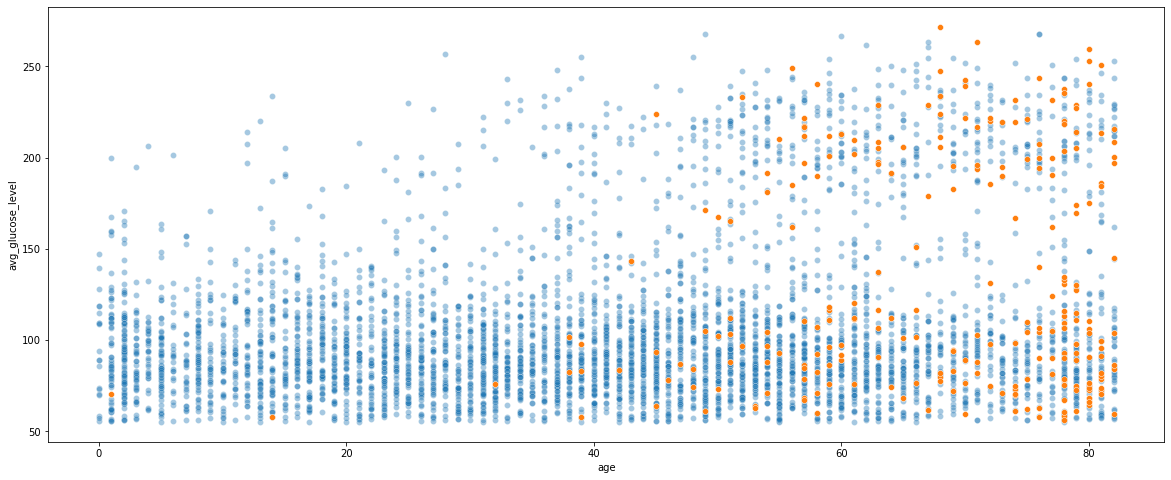

In [73]:
# AVG Glucose level vs Age with hue = stroke
plt.figure(figsize = (20,8))
ax = sns.scatterplot(x="age", y="avg_glucose_level", alpha=0.4, data=df[df['stroke']==0])
sns.scatterplot(x="age", y="avg_glucose_level", alpha=1, data=df[df['stroke']==1], ax=ax)
plt.show()

**NOTE** = From the above plot, I can conclude that the person having the maximum possibility of getting a stroke whose Age within 40 to 80.

**Finding Outliers**

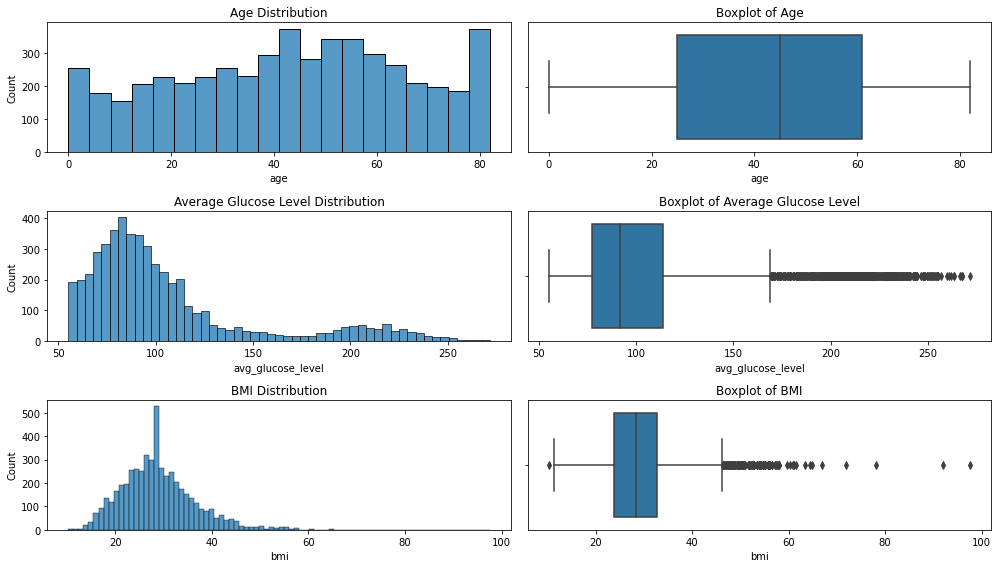

In [74]:
f, axes = plt.subplots(3, 2, figsize=(14,8))
sns.histplot( x=df.age , ax=axes[0,0])
axes[0,0].set_title("Age Distribution")
sns.boxplot( x=df.age , ax=axes[0,1])
axes[0,1].set_title("Boxplot of Age")
sns.histplot(x=df.avg_glucose_level , ax=axes[1,0])
axes[1,0].set_title("Average Glucose Level Distribution")
sns.boxplot(x=df.avg_glucose_level, ax= axes[1,1])
axes[1,1].set_title("Boxplot of Average Glucose Level")
sns.histplot(x=df.bmi,ax=axes[2,0])
axes[2,0].set_title("BMI Distribution")
sns.boxplot(x=df.bmi, ax = axes[2,1])
axes[2,1].set_title("Boxplot of BMI")
plt.tight_layout()

We can see that, there are many outliers in column of Average Glucose Level and BMI. We have to deal with them in modelling phase.

 ### Correlation Table

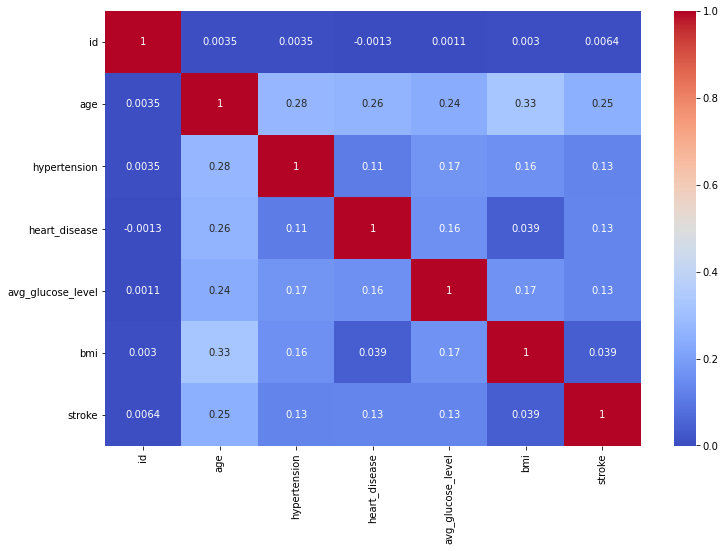

In [75]:
cor = df.corr() # clculating correlation matrix
# plotting correlation using heatmap
# cor>0.5 v.good
# cor<0.5 and >0.1 good
# cor<-0.5 v.good
# cor>-0.5 and <-0.1 good
# -0.1 to +0.1 ~0 bad
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot = True, cmap = 'coolwarm')
plt.show()


**NOTE**:Age is almost slightly positive correlated with other features such as hyper tension, heart disease, glucose level, bmi and even stroke. So, As the age increases, the health related issues also increases in general. Here, Age could be a good indicator for predicting whether a person will be affected by Stroke or not

### Model Building

**1.Converting the categorical columns into numerical by mapping each category to an integer value using map() on pandas series object.**

In [76]:
# Converting categorical data to numerical

gender_dict = {'Male': 0, 'Female': 1, 'Other': 2}
ever_married_dict = {'No': 0, 'Yes': 1}
work_type_dict = {'children': 0, 'Never_worked': 1, 'Govt_job': 2, 'Private': 3, 'Self-employed': 4}
residence_type_dict = {'Rural': 0, 'Urban': 1}
smoking_status_dict = {'Unknown': 0, 'never smoked': 1, 'formerly smoked':2, 'smokes': 3}

df['gender'] = df['gender'].map(gender_dict)
df['ever_married'] = df['ever_married'].map(ever_married_dict)
df['work_type'] = df['work_type'].map(work_type_dict)
df['Residence_type'] = df['Residence_type'].map(residence_type_dict)
df['smoking_status'] = df['smoking_status'].map(smoking_status_dict)

In [77]:
# Splitting into features and value to be predicted
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']

**2.As we saw earlier, the data is imbalanced. To make it balanced we will use a technique called SMOTE (Synthetic minority oversampling technique).**

SMOTE - Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

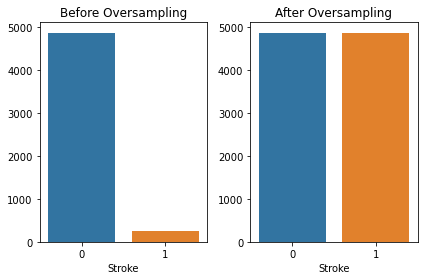

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

**3.Splitting the data into training and testing samples.**

In [79]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

**4.Creating a model for stroke prediction**

In [80]:
# Importing neccessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f"Accuracy Score : {round(accuracy_score(y_test, prediction) * 100, 2)}%")

Accuracy Score : 93.28%


In [81]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1425
           1       0.92      0.96      0.94      1492

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



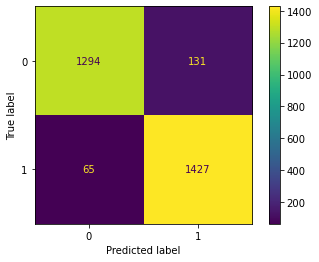

In [82]:
plot_confusion_matrix(pipeline, X_test, y_test)
plt.grid(False)
plt.show()

### Observation

* **True Positive**(Outcome where the model correctly predicts the positive class) = **1427**

* **True Negative**(Outcome where the model correctly predicts the negative class) = **1300**

* **False Positive**(Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative) = **125**

* **False Negative**(Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive) = **65**

## Conclusion

**1. The accuracy of our RandomForest Classifier model is 93.49% .**

**2. Age is a most better feature to predict stroke.**